# Binary classification task
In this notebook, we will use the clean dataset to evaluate the accuracy of different classifiers in predicting the survival of the passengers based on the considered features. For simplicity, we will use the standard libraries from scikit-learn.

## The datasets
For this exercise, we do not have the ground truth for the test set, so we will use only the training set for the evaluation. The first step is to import the clean data and the target labels. The train data should be provided as a matrix (numpy array) with dimensions $n_{samples} \times n_{features}$, and the targets are a binary vector of size $n_{samples}$.

In [19]:
import matplotlib.pyplot as pl
import numpy as np
#train_data = np.load()
#target_labels = np.load()

## The classifiers
There are lots of different models that can be used to solve this problem. This should be instructed by the structure of the dataset and the characteristics of the features considered. Alternatively or additionally, it is always helpful (if computing resources allow) to do a brute-force search, where we compare the accuracy of a large number of applicable models. We will use this option since the dataset is rather small ($n_{samples}=891$, $n_{features}=7$) and apply the following classifiers (for more information, see e.g. [binary classification](https://en.wikipedia.org/wiki/Binary_classification)):

* Logistic Regression
* Decision Trees
* Support Vector Machines 
* Linear and Quadratic Discriminant Analysis
* Random Forest 
* K-Nearest Neighbors
* Naive Bayes 
* Artificial Neural Networks - multi-layer perceptron

All of these models have a standard implementation in scikit-learn, which makes the task extremely simple. Let's import all the relevant models:

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

We start by initializing all the classifiers. Note that the results can be very sensitive to the initialization parameters and, for each specific model, results can be improved by these choices. Additionally, some models can use some preliminary hyper-parameter tuning (e.g. nonlinear SVM), which can be done by grid-search and cross-validation. To learn more about this and about the model implementation itself, check the documentation of each model.
For simplicity, we will use standard parameters.

In [13]:
classifiers = [
    LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr'), 
    DecisionTreeClassifier(max_depth=5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    KNeighborsClassifier(3),
    GaussianNB(),
    MLPClassifier(alpha=1, max_iter=1000),
]

classifier_names = [
    "Logistic Regression", 
    "Decision Tree", 
    "Linear SVM", 
    "Nonlinear SVM", 
    "Linear Discriminant Analysis", 
    "Quadratic Discriminant Analysis", 
    "Random Forest", 
    "K-Nearest Neighbors", 
    "Gaussian Naive Bayes",
    "Multi-Layer Perceptron"
]

For this example, until the original dataset is ready, we will use a synthetic dataset generated in sklearn, with the same number of samples and features to serve as an example. 

In [14]:
from sklearn.datasets import make_classification
train_data, target_labels = make_classification(n_samples=891, n_features=7)
print(train_data.shape, target_labels.shape)

(891, 7) (891,)


Now, all we need to do is iterate the classifiers, train and evaluate them systematically. In scikit-learn, this is as easy as possible

In [26]:
classifier_scores = []
for clf, clf_id in zip(classifiers, classifier_names):
    clf.fit(train_data, target_labels)
    score = clf.score(train_data, target_labels)  # this would normally be done on the test set
    print(clf_id, score)
    classifier_scores.append(score)

Logistic Regression 0.9012345679012346
Decision Tree 0.9438832772166106
Linear SVM 0.9046015712682379
Nonlinear SVM 0.9887766554433222
Linear Discriminant Analysis 0.9090909090909091
Quadratic Discriminant Analysis 0.7890011223344556
Random Forest 0.9281705948372615
K-Nearest Neighbors 0.9349046015712682
Gaussian Naive Bayes 0.8754208754208754


/home/neuro/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/neuro/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Multi-Layer Perceptron 0.9135802469135802


## Results

[Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'Linear SVM'),
 Text(0, 0, 'Nonlinear SVM'),
 Text(0, 0, 'Linear Discriminant Analysis'),
 Text(0, 0, 'Quadratic Discriminant Analysis'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'K-Nearest Neighbors'),
 Text(0, 0, 'Gaussian Naive Bayes'),
 Text(0, 0, 'Multi-Layer Perceptron')]

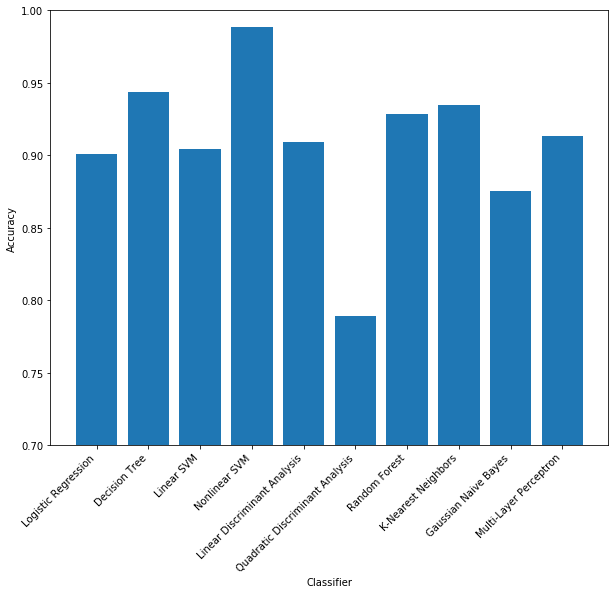

In [34]:
fig = pl.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.bar(np.arange(0, len(classifiers)), height=classifier_scores, align='center')
ax.set_ylim([0.7, 1.])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Classifier')
ax.set_xticks(np.arange(0, len(classifiers)))
ax.set_xticklabels(classifier_names, rotation = 45, ha="right")

# Resources
[Tutorial on binary classification](https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/)
[Pretty decision boundaries for different classifiers](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
[Outline of classification vs regression problems](https://spark.apache.org/docs/2.2.0/ml-classification-regression.html)
[Binary classification]